<a href="https://colab.research.google.com/github/RicoGac/Rico/blob/main/TP4_Multimodal_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multimodal Deep Learning Models



In business applications and industries, document image classification is critical for automating workflows, improving efficiency, and ensuring accurate decision-making. Similar to the fusion of medical imaging and EHR data in healthcare, combining multiple modalities, such as pixel data from document images and contextual information (metadata, document history, or other text-based data), can lead to better classification models with higher accuracy and greater business value.

###Importance of Document Image Classification in Business Applications


In industries such as finance, legal, healthcare, and logistics, the ability to accurately classify documents like invoices, contracts, receipts, medical records, and bills of lading is crucial. Traditional manual document processing is time-consuming, error-prone, and often leads to delays, especially when handling large volumes of data. Automated document classification using advanced machine learning and deep learning techniques allows businesses to extract key insights, reduce processing times, and ensure compliance with regulations.

For example, financial institutions rely on accurate classification of invoices, contracts, and financial reports for regulatory compliance and fraud detection. In the legal industry, correct classification of case files, contracts, and legal documents ensures efficient case management and retrieval of relevant information. Similarly, in healthcare, precise classification of medical records, insurance claims, and patient files ensures better patient care and faster service delivery.
Challenges and the Need for Multimodal Approaches

Document classification systems that rely purely on image-based information, such as scanning pixel data from documents, may fall short in performance due to the complexity of business documents. These documents often contain a combination of structured data (tables, forms), unstructured text (narratives, notes), and metadata (timestamps, authorship), all of which must be considered to achieve accurate classification.

As in healthcare, where interpreting a chest x-ray without clinical context could lead to inaccurate diagnoses, document classification without contextual information (e.g., document purpose, associated text) might result in misclassification. A contract, for instance, could be easily mistaken for a letter without examining its contents and associated metadata.

###Fusion Techniques

**Image Fusion in Document Image Classification for Business Applications**

In business applications, document image classification often requires the fusion of information from multiple sources or modalities, similar to how image fusion is used in medical imaging. Document image classification can involve combining visual data from scanned documents (images) with textual data, metadata, or other contextual information to improve the accuracy of classification algorithms. The goal of document image fusion is to enhance the features of each data source so that machine learning algorithms can perform better than they would using a single data channel.
Fusion of Multiple Data Channels

In the context of document image classification, "data channels" can refer to various types of information, such as:

    - Visual data (scanned document images, layouts, graphics)
    - Textual data (extracted text, metadata, and other contextual information such as dates, authors, or file types)
    - External data (associated historical documents, external databases, or related files)

Business documents may contain both image and text data that can be heterogeneous or complementary. Each channel offers unique features that, when combined, can provide a richer representation of the document for more accurate classification. For example, the image data may capture the document’s structure (e.g., tables or forms), while the text provides its semantic content (e.g., an invoice or a contract).

**Types of Data Fusion for Document Image Classification**

Similar to multimodal fusion techniques in medical imaging, document image classification relies on choosing the appropriate fusion strategy based on the data channels and the goals of the application. The main types of fusion strategies are:

###Early Fusion:

####Early fusion merges the various data channels at the beginning of the machine learning model training. These individual modality features may be joined in different ways, such as by average pooling, weighted concatenation, or gated fusion techniques (Type I or II in Fig. 1). The unimodal local features are initially extracted from their individual inputs and then concatenated into a joint representation. Therefore, the unified model must ensure that the data/features are correctly aligned in order to enable joint processing. As a result, converting data sources into a single feature vector is a significant challenge in early data fusion approaches. In reality, the conditionally independent criteria between medical data sources are not always true as multiple modalities may have highly correlated features, possibly because of acquisition setting. Therefore, different data collection modalities are typically spatially aligned (known as image registration) with a standard pixel sampling rate (for images or perhaps time for other modalities) to make a common ground for fusion. If the data is aligned correctly, the cross-correlations between data items may be exploited, which provides an opportunity to increase the system performance (Gadzicki et al. 2020).


<img src="https://i.ibb.co/WchcPN1/fig1.png"><br>
*Figure 1.* **Early Fusion**<br><br>


###Late or Ensemble Fusion:
####In late fusion, the individual streams fully process each data channel separately and their outputs are merged at a decision-making or prediction stage through a summation, averaging operation, or majority voting. Similar to the ensemble technique, the late fusion process learns the optimal combination of each component that maximizes performance. The learning process handles the errors independently, decorrelates errors, and thus improves performance with respect to each modality. The major drawback lies in the limited potential for the exploitation of cross-correlations between the different unimodal data.
<img src="https://i.ibb.co/T2JHW4X/fig2.png"><br>
*Figure 2.* **Late Fusion** <br><br>
###Joint Fusion
####Joint fusion was introduced to fuse the imaging feature representations with the clinical features before feeding them into the model. Because of the differences between the imaging and clinical features in dimensionality and dynamic range, different models were introduced (Haylat 2020) to scale their clinical features before fusion and improve their performance (Fig. 3).
<img src="https://i.ibb.co/kKxVYfz/fig3.png"><br>
*Figure 3.* **Joint Fusion, Type I (Up) and Type II (down)** <br><br>



### Import Packages

In [1]:
# Variables for data preprocessing and model configuration
MAX_FEATURES = 5000  # Maximum number of features for TF-IDF
IMAGE_SIZE = (224, 224)  # Target size for resizing images
NUM_CLASSES = 16  # Number of classes for classification
epochs = 100 # if GPU on Google Collab, If CPU, use 10
batch_size = 32
LR = 0.001
NUM_CLASSES = 16 # number of classes in the dataset
image_feature_size = 5000  # For example, using ResNet50 features
text_feature_size = 5000  # Assuming TF-IDF with 5000 features
SEED = 42  # Seed for reproducibility
DATASET_NAME = 'SBakkali/rvlcdip_subset'  # Specify your dataset name here

In [2]:
!pip install datasets
!pip install scikit-learn
!pip install tensorflow

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00


## Dataset

<img src="https://labelyourdata.com/img/article-illustrations/splitting_data.png" height=200>


When training  a DL model, we use a Dataset. The model uses the data to learn something for a task. We usually divide the data into Training, Validation, Test sets.
- **Training set** is used to train the Model (i.e., to find the parameters of Model).
- **Validation set** is used to watch the Model's training (to verify whether the training procedure goes well).
- **Test set** is used to evaluate the performance of the Model (in our case, to measure if the model compresses and decompresses well new images).

<img src="https://i.imgflip.com/653bu2.jpg" height=400>

**In our case of AE, we do not need the label of image. Our method is an unsupervised algorithm.**

In [3]:
# data_preparation.py
import numpy as np
from datasets import load_dataset
# data_preprocessing.py
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

## The first one : the training set

The good questions to ask !

- What is the size of the training dataset?
- What are the elements available in one piece of data? (image, label)
- What is the shape of one piece of data?
- What is the type of one piece of data?
- Plot few elements of the dataset using matplotlib (plt since matplotlib was imported as plt).

### Data Loading

In this step, we will load a multimodal dataset from a specified file using NumPy. The dataset consists of images, texts, and their corresponding labels for training, validation, and testing. Loading the data correctly is essential for the subsequent steps in our machine learning pipeline, as it forms the foundation upon which we will perform preprocessing, feature extraction, and model training. The images, texts, and labels will be organized into NumPy arrays for easier manipulation and access throughout the modeling process.

In [4]:
#First download the data
!wget "https://ao.univ-lr.fr/index.php/s/QsE3tJd6JR6BBxa/download"

--2024-10-09 11:25:44--  https://ao.univ-lr.fr/index.php/s/QsE3tJd6JR6BBxa/download
Resolving ao.univ-lr.fr (ao.univ-lr.fr)... 193.48.38.49
Connecting to ao.univ-lr.fr (ao.univ-lr.fr)|193.48.38.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3680019486 (3.4G) [application/octet-stream]
Saving to: ‘download’

download            100%[===================>]   3.43G  33.8MB/s    in 1m 54s  

2024-10-09 11:27:38 (30.9 MB/s) - ‘download’ saved [3680019486/3680019486]



In [5]:
def load_multimodal_dataset(dataset_name):
    # Load the dataset from the specified .npz file
    dataset = np.load(dataset_name, allow_pickle=True)

    # Convert training data to NumPy arrays
    train_images = np.array(dataset['train']['image'])
    train_texts = np.array(dataset['train']['text'])
    train_labels = np.array(dataset['train']['label'])

    # Convert validation data to NumPy arrays
    valid_images = np.array(dataset['valid']['image'])
    valid_texts = np.array(dataset['valid']['text'])
    valid_labels = np.array(dataset['valid']['label'])

    # Convert test data to NumPy arrays
    test_images = np.array(dataset['test']['image'])
    test_texts = np.array(dataset['test']['text'])
    test_labels = np.array(dataset['test']['label'])

    # Return the data as tuples for easier access
    return (train_images, train_texts, train_labels), (valid_images, valid_texts, valid_labels), (test_images, test_texts, test_labels)


In [6]:
train_data, valid_data, test_data = load_multimodal_dataset("./output_dataset_100_per_class.npz")

In [7]:
train_images, train_texts, train_labels = train_data

## Data Visualization

In this step, we will define the categories of the dataset and implement a function to visualize one sample from each class. This will help students understand the diversity of the dataset and the various categories represented in it. By visualizing the data, students can gain insights into the samples they will work with during training and testing.

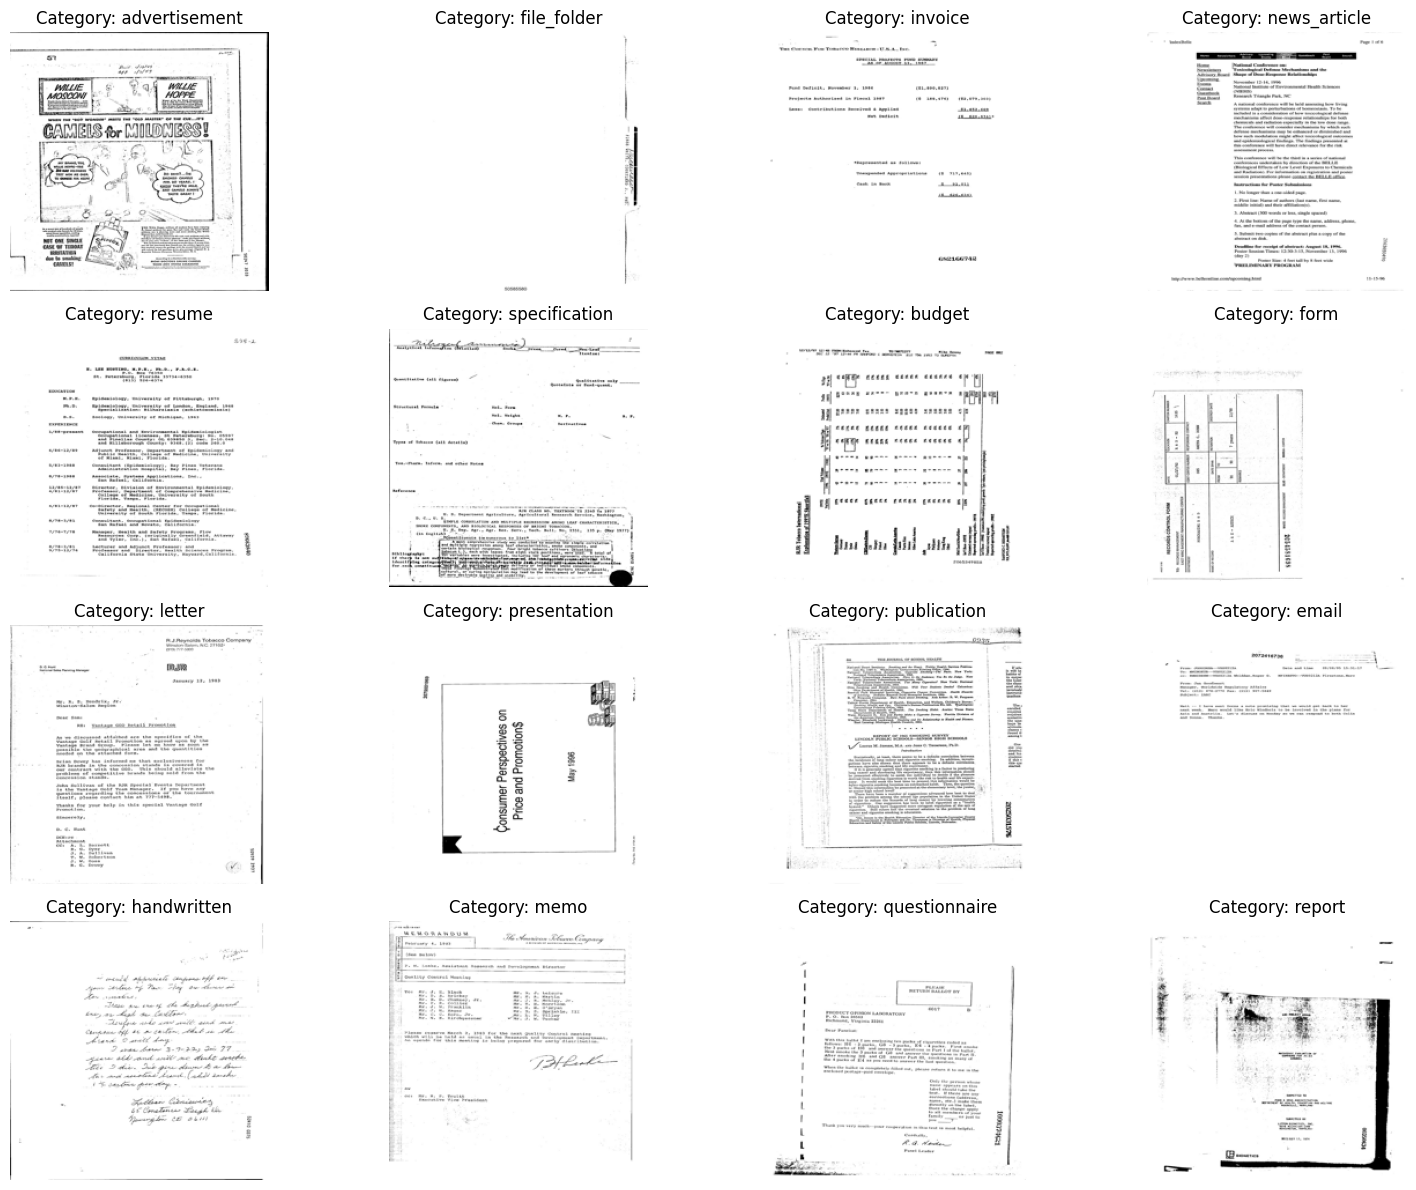

In [8]:
# Define the categories
categories = [
    "advertisement", "file_folder", "invoice", "news_article", "resume",
    "specification", "budget", "form", "letter", "presentation",
    "publication", "email", "handwritten", "memo",
    "questionnaire", "report"
]

# Create a mapping from label id to category name
label_to_category = {i: category for i, category in enumerate(categories)}

def plot_one_sample_per_class(images, labels):
    # Set the figure size for the plots
    plt.figure(figsize=(16, 12))

    # Create a dictionary to store lists of samples for each class
    samples_per_class = {i: [] for i in range(len(categories))}

    # Iterate through the images and labels
    for img, label in zip(images, labels):
        class_id = label  # Get the class id from the label

        # Add the image to the list of samples for this class
        samples_per_class[class_id].append(img)

    # Plot the samples
    for class_id in range(len(categories)):
        samples = samples_per_class[class_id]
        if samples:  # Only plot if there are samples for this class
            # Randomly select one sample from the list of samples for this class
            sample = random.choice(samples)

            plt.subplot(4, 4, class_id + 1)  # Create a subplot for each class
            image_pil = Image.fromarray(sample)  # Convert to PIL Image
            image_resized = image_pil.resize((224, 224))  # Resize to (224, 224)
            plt.imshow(image_resized)  # Display the resized image
            plt.title(f'Category: {label_to_category[class_id]}')  # Show the category name
            plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# TODO: Write code to load the images and labels, and call `plot_one_sample_per_class` with them.
# Instructions:
# 1. Load the images and labels from your dataset.
# 2. Call the `plot_one_sample_per_class` function, passing the images and labels as arguments.
plot_one_sample_per_class(train_images, train_labels)



In [11]:
train_images, train_texts, train_labels = train_data

In [12]:
def preprocess_images(images):
    # Initialize a list to store processed images
    processed_images = []

    # Loop through each image for preprocessing
    for idx, img in enumerate(images):
        img_pil = Image.fromarray(img)  # Convert NumPy array to PIL Image

        # TODO: # Resize images to match the input size required by the model
        img_resized = img_pil.resize((224, 224))  # Resize to (224, 224)
        img_array = np.array(img_resized)
        # TODO: # Normalize the pixel values to the range [0, 1]
        img_normalized = img_array / 255.0

        processed_images.append(img_normalized)  # Append the processed image to the list

    return np.array(processed_images)  # Return the array of processed images

def preprocess_texts(texts):
    # Create a TF-IDF vectorizer to convert text data into numerical format
    vectorizer = TfidfVectorizer(max_features=text_feature_size)  # Limit to 5000 features

    # TODO: Fit the vectorizer on the texts and transform them into a TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(texts)

    return tfidf_matrix.toarray()  # Convert sparse matrix to dense array


## Data Extraction and Preprocessing

In this section, we will extract and preprocess the training, validation, and test datasets. This is essential to ensure that the data is in the right format and properly normalized before feeding it into the model. Additionally, shuffling the training and validation datasets helps to ensure that the model generalizes well during training.

In [13]:
# Assuming train_data, valid_data, and test_data are already defined
# Adjusting for the shape (3, 1120)
print("Extracting training, validation, and test data...")

#TODO : Extracting images, texts, and labels from the training dataset
train_images = train_data[0]  # Get training images
train_texts = train_data[1]   # Get training texts
train_labels = train_data[2]   # Get training labels

#TODO : Extracting images, texts, and labels from the validation dataset
valid_images = valid_data[0]  # Get validation images
valid_texts = valid_data[1]   # Get validation texts
valid_labels = valid_data[2]   # Get validation labels

#TODO : Extracting images, texts, and labels from the test dataset
test_images = test_data[0]  # Get test images
test_texts = test_data[1]   # Get test texts
test_labels = test_data[2]   # Get test labels

# Preprocess the data
print("Preprocessing training data...")
processed_train_images = preprocess_images(train_images)  # Prétraiter les images d'entraînement
processed_train_texts = preprocess_texts(train_texts)  # Prétraiter les textes d'entraînement

print("Preprocessing validation data...")
processed_valid_images = preprocess_images(valid_images)  # Preprocess validation images
processed_valid_texts = preprocess_texts(valid_texts)  # Preprocess validation texts

print("Preprocessing test data...")
processed_test_images = preprocess_images(test_images)  # Prétraiter les images de test
processed_test_texts = preprocess_texts(test_texts)  # Prétraiter les textes de test

# Shuffle the training data
print("Shuffling training data...")

# TODO: Use the shuffle function from scikit-learn to shuffle the training data, make sure to use random_state=SEED
from sklearn.utils import shuffle
processed_train_images, processed_train_texts, train_labels = shuffle(processed_train_images, processed_train_texts, train_labels, random_state=SEED)


# Shuffle the validation data
print("Shuffling validation data...")
# TODO: Use the shuffle function from scikit-learn to shuffle the validation data, make sure to use random_state=SEED
processed_valid_images, processed_valid_texts, valid_labels = shuffle(processed_valid_images, processed_valid_texts, valid_labels, random_state=SEED)


Extracting training, validation, and test data...
Preprocessing training data...
Preprocessing validation data...
Preprocessing test data...
Shuffling training data...
Shuffling validation data...


## One-Hot Encoding of Labels

In this part of the code, we will convert the categorical labels into one-hot encoded format using TensorFlow's utility function. One-hot encoding transforms each label into a binary array, which is useful for multi-class classification tasks, allowing the model to predict the probability of each class independently.

In [14]:
# Assuming you have your labels in numpy arrays

# TODO: Convert labels to one-hot encoding
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels)
valid_labels_one_hot = tf.keras.utils.to_categorical(valid_labels)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels)


## Model Creation

We saw what the data was and created our datasets. We need now to fullfil our mission and we need a model.

<img src="https://i.imgflip.com/640uob.jpg" height=300>

In this section, we will define functions to create separate models for processing images and texts, as well as a combined early fusion model that integrates both modalities.

In [15]:
# Function to create the image model using the functional API
def create_image_model(input_shape=image_feature_size):
    # Load the base model (ResNet50) with pre-trained weights, excluding the top layers
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the convolutional base to prevent weight updates during training

    # Define the image input layer
    image_input = layers.Input(shape=input_shape)
    x = base_model(image_input)  # Pass the input through the base model
    x = layers.GlobalAveragePooling2D()(x)  # Apply global average pooling to reduce the spatial dimensions
    x = layers.Dense(512, activation='relu')(x)  # Add a dense layer with ReLU activation
    image_output = layers.Dropout(0.5)(x)  # Add dropout to reduce overfitting

    # Define the complete model with image input and output
    model = models.Model(inputs=image_input, outputs=image_output)
    return model  # Return the constructed image model

# Function to create the text model using the functional API
def create_text_model(input_shape=(text_feature_size)):  # Assuming 5000 features from TF-IDF
    # Define the text input layer
    text_input = layers.Input(shape=input_shape)
    x = layers.Dense(512, activation='relu')(text_input)  # Add a dense layer with ReLU activation
    text_output = layers.Dropout(0.5)(x)  # Add dropout to reduce overfitting

    # Define the complete model with text input and output
    model = models.Model(inputs=text_input, outputs=text_output)
    return model  # Return the constructed text model


def preprocess_texts(texts):
    # Créer un vectoriseur TF-IDF pour convertir les textes en format numérique
    vectorizer = TfidfVectorizer(max_features=128)  # Limiter à 128 caractéristiques

    # Adapter le vectoriseur sur les textes et les transformer en matrice TF-IDF
    tfidf_matrix = vectorizer.fit_transform(texts)

    return tfidf_matrix.toarray()  # Convertir la matrice creuse en tableau dense


In [16]:
# Function to create an early fusion model
def create_early_fusion_model(image_feature_size=(224, 224, 3), text_feature_size=5000, fusion_type='concatenate'):
    # TODO: Create the image and text models using previously defined functions
    # Check for the code to create the image and text models
    image_model = create_image_model(image_feature_size)
    text_model = create_text_model(text_feature_size)

    # TODO: Get the outputs from both models
    image_output = image_model.output
    text_output = text_model.output

    # TODO: Fuse the outputs based on the specified fusion type
    # Check for fusion functions and implement the merging logic
    if fusion_type == 'concatenate':
        merged = layers.Concatenate()([image_output, text_output])  # Concaténer les sorties
    elif fusion_type == 'average':
        merged = layers.Average()([image_output, text_output])  # Averager les sorties
    elif fusion_type == 'element-wise':
        merged = layers.Add()([image_output, text_output])  # Ajouter les sorties élément par élément
    else:
        raise ValueError("Type de fusion non supporté. Utilisez 'concatenate', 'average', ou 'element-wise'.")

    # Fully connected layers after fusion
    x = layers.Dense(128, activation='relu')(merged)  # Add a dense layer with ReLU activation with 128 units
    output = layers.Dense(NUM_CLASSES, activation='softmax')(x)  # Final output layer with softmax activation for multi-class classification (NUM_CLASSES)

    # Define the final fusion model with inputs from both image and text models
    fusion_model = models.Model(inputs=[image_model.input, text_model.input], outputs=output)
    return fusion_model  # Return the constructed fusion model
# Compiling the model
#early_fusion_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Model Training and Fitting

In this section, we will define the training parameters and create our early fusion model. We will then compile the model with appropriate settings and fit it to our training data. This process involves training the model for a specified number of epochs and evaluating its performance using the validation data.

### a- Loss function

The loss function must tell us how far our predictions are from the true labels. This could be done by comparing the distributions of two input data, or by directly comparing the data using some distance metrics.

<img src="https://i.imgflip.com/653jbl.jpg" height=400>

### b- An Optimizer

<img src="https://i.imgflip.com/640sfs.jpg" height= 400>

We need gradually update the weights of the model. In fact, we perform the **gradient descent** to recalculate the weights of each layer regarding the model's predictions. The optimizer will search for an Optimum. It needs a step to perform this research. This step is called the **learning rate**. The learning rate has an important effect on the learning phase (duration, convergence,...)

<img src=https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI. height =300>

In this case, we will use Adam & SGD Optimizers (it is efficient). Don't hesitate to have a look at the other optimizers.

### c- Training

Please use GPU to accelerate this phase. (Use Google Collab)

Now we have to create the training loop which consists of :
* Sending Data through the model to obtain Predictions
* Computing the Loss
* Backwarding the Loss using Gradients
* Logging the losses and accuracies (if exists)

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

Gradient descent: think of it as you trying to answer an exercise : the first time you won't understand, the seconde time you'll suceed more, and so on...

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Définir les paramètres d'entraînement
NB_EPOCHS = 100  # Ajustement du nombre d'époques pour obtenir de meilleurs résultats d'entraînement
BATCH_SIZE = 64  # Taille de lot appropriée pour l'entraînement

# TODO: Créer le modèle
# Utiliser la fonction create_early_fusion_model pour construire le modèle avec les différents types de fusion
early_fusion_model = create_early_fusion_model(image_feature_size=(224, 224, 3), text_feature_size=(128,), fusion_type='concatenate')

# TODO: Compiler le modèle
# Compiler le modèle avec un optimiseur, une fonction de perte, et des métriques
early_fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TODO: Prétraiter les données d'entraînement, de validation et de test
print("Preprocessing training data...")
processed_train_images = preprocess_images(train_images)  # Prétraiter les images d'entraînement
processed_train_texts = preprocess_texts(train_texts)  # Prétraiter les textes d'entraînement

print("Preprocessing validation data...")
processed_valid_images = preprocess_images(valid_images)  # Prétraiter les images de validation
processed_valid_texts = preprocess_texts(valid_texts)  # Prétraiter les textes de validation

print("Preprocessing test data...")
processed_test_images = preprocess_images(test_images)  # Prétraiter les images de test
processed_test_texts = preprocess_texts(test_texts)  # Prétraiter les textes de test

# TODO: Mélanger les données
print("Shuffling training data...")
processed_train_images, processed_train_texts, train_labels = shuffle(processed_train_images, processed_train_texts, train_labels, random_state=SEED)

print("Shuffling validation data...")
processed_valid_images, processed_valid_texts, valid_labels = shuffle(processed_valid_images, processed_valid_texts, valid_labels, random_state=SEED)

# TODO: Entrainer le modèle

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = early_fusion_model.fit(
    x=[processed_train_images, processed_train_texts],
    y=train_labels_one_hot,
    validation_data=([processed_valid_images, processed_valid_texts], valid_labels_one_hot),
    epochs=NB_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Preprocessing training data...
Preprocessing validation data...
Preprocessing test data...
Shuffling training data...
Shuffling validation data...
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 319s 17s/step - accuracy: 0.0649 - loss: 2.9213 - val_accuracy: 0.0844 - val_loss: 2.7518
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 304s 16s/step - accuracy: 0.1050 - loss: 2.7450 - val_accuracy: 0.0969 - val_loss: 2.6967
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 288s 16s/step - accuracy: 0.1768 - loss: 2.6009 - val_accuracy: 0.1250 - val_loss: 2.6637
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 325s 16s/step - accuracy: 0.2660 - loss: 2.4063 - val_accuracy: 0.1688 - val_loss: 2.5937
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 292s 16s/step - accuracy: 0.3822 - loss: 2.1416 - val_accuracy: 0.2219 - val_loss: 2.5631
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 337s 17s/step - accuracy: 0.4651 - loss: 1.8541 - val_accuracy: 0.2031 - val_loss: 2.5830
Epoch 7/100
18/18 ━━━━━━━━━━

### d- Did it learn something ?

As you might see we've logged into two lists (train_loss, val_loss) of loss computed during training. Let's plot them (do not forget to put titles and axis)
- How can you tell that the training is over?

## Visualizing Training History

After training the model, it is essential to analyze its performance over the epochs. We will plot both accuracy and loss metrics for the training and validation datasets. This visualization helps us understand how well the model is learning and whether it is overfitting or underfitting.

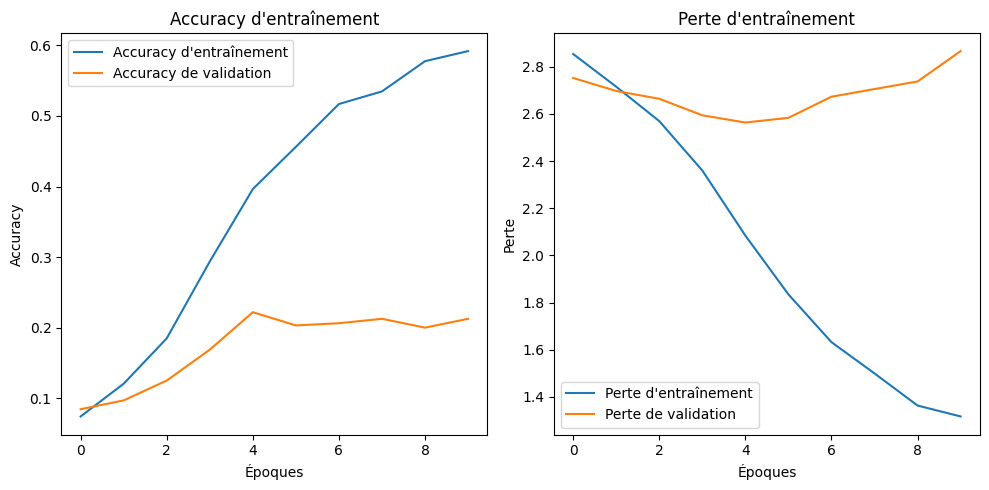

In [18]:
def plot_training_history(history):
    # TODO: Set the figure size for the plots
    plt.figure(figsize=(10, 5))  # Définir la taille de la figure pour les plots

    # TODO: Create a subplot for accuracy
    plt.subplot(1, 2, 1)  # Create a subplot for accuracy

    # TODO: Plot training accuracy
    plt.plot(history.history['accuracy'], label='Accuracy d\'entraînement')
    plt.title('Accuracy d\'entraînement')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()

    # TODO: Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label='Accuracy de validation')
    plt.legend()

    # TODO: Create a subplot for loss
    plt.subplot(1, 2, 2)  # Create a subplot for loss

    # TODO: Plot training loss
    plt.plot(history.history['loss'], label='Perte d\'entraînement')
    plt.title('Perte d\'entraînement')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    # TODO: Plot validation loss
    plt.plot(history.history['val_loss'], label='Perte de validation')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plots

# TODO: Call the plotting function with the history object
plot_training_history(history)





## Testing the Model

We already trained our model, let's test it on testing set.

---

Now take the test dataloader, iterate through it and send the test data to the model. We need to check how similar to the original image the decompressed image is..
Do not forget to delete all gradient calculation, it takes time and space for nothing.

---





In [19]:
# Convert test labels to one-hot encoding if not already done
test_labels_one_hot = to_categorical(test_labels, num_classes=16)

# Evaluate the model on the test set
test_loss, test_accuracy = early_fusion_model.evaluate([processed_test_images, processed_test_texts], test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy:.4f}')  # Display test accuracy

# Generate predictions for the test set
test_predictions = early_fusion_model.predict([processed_test_images, processed_test_texts])
predicted_classes = np.argmax(test_predictions, axis=1)  # Get predicted class indices
true_classes = np.argmax(test_labels_one_hot, axis=1)  # Assuming one-hot encoded labels

print(f'Predicted classes: {predicted_classes}')
print(f'True classes: {true_classes}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.2942 - loss: 2.2989
Test Accuracy: 0.1937
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step
Predicted classes: [ 0  0  0  0  0 10  0  0  0  0 10  1  1  1  5  1  1  0  1  1  3  1  4  1
  5  3  2 10  5  2 11 10 11  0  3  0  5  0  5  3  2 11 11  4 11 10  7  4
 11  3  2 10  7 15 15  2 10  2 10  2  2  5  2  2 10  3  2  1  2 10 15 10
  1  0  3  1  5 10  3 15  3  2 11  5  5  5  7  3 10 10  1  7  1  1  1 10
  3 10 10  5  4  2  4 10  2  1 10  4  7  5  2  2 11 11  3 10  3 11  3 11
 12  1 15  1 12  1  1 12  1  1  4  2  3  2  2  2  2  4  7 10  5  2 15  3
  4  5  2 10  4  1  2  2  2  4 10 11  3  2 14  2]
True classes: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11

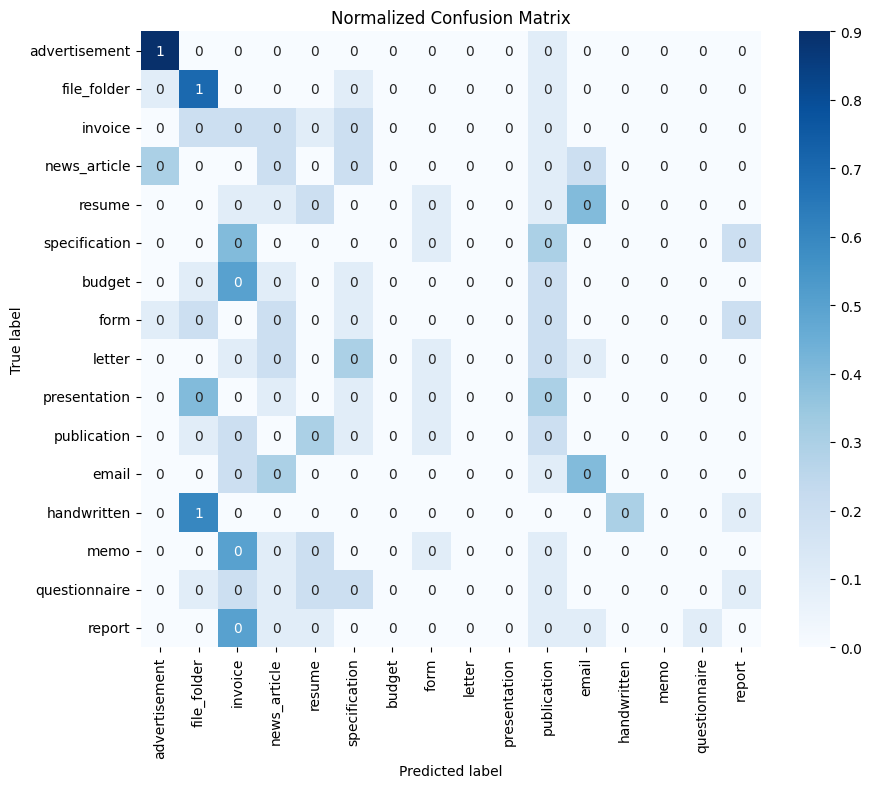

In [20]:
# Create a confusion matrix : use confusion_matrix from scikit-learn
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix to show probabilities
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.0f', cmap='Blues', xticklabels=categories, yticklabels=categories) # TODO: Plot the confusion matrix (use sns.heatmap)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()


## Generating a Classification Report

After evaluating the model and analyzing the confusion matrix, it's beneficial to generate a classification report. This report provides detailed metrics such as precision, recall, and F1-score for each class, allowing for a deeper understanding of the model's performance. These metrics are crucial for assessing how well the model generalizes to unseen data.

In [21]:
# Generate classification report
report = classification_report(true_classes, predicted_classes)

print(report)


              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.29      0.70      0.41        10
           2       0.07      0.20      0.10        10
           3       0.12      0.20      0.15        10
           4       0.18      0.20      0.19        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.09      0.20      0.12        10
          11       0.33      0.40      0.36        10
          12       1.00      0.30      0.46        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10

    accuracy                           0.19       160
   macro avg       0.17   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Comparative Analysis and study:

### Task1: Hyperparameter Tuning
Experiment with hyperparameter tuning to improve the performance of your models further. Focus on the best model identified for early fusion and late fusion.

    - Select Best Models:
        Based on the results from your analysis, select the best-performing model for both early fusion and late fusion methods.

    - Hyperparameter Tuning:
        Tune the following hyperparameters to potentially improve model performance:
            Learning Rate: Experiment with different values (e.g., 0.001, 0.01, 0.1).
            Change Optimizer: Switch from Adam to Stochastic Gradient Descent (SGD) and experiment with:
                Momentum (try values like 0.9 or 0.99).
                Gradient Clipping (set a threshold to avoid exploding gradients).
            Number of Epochs: Increase or decrease the number of training epochs. (Consider using EarlyStopping)
            Batch Size: Experiment with different batch sizes (e.g., 16, 32, 64).
    - Evaluate Performance:
        After tuning the hyperparameters, evaluate the performance of the updated models using the same metrics as before (accuracy, confusion matrix, and classification report).
        Document how each change affected performance and summarize your findings.

### Task2:
    - What insights can you gather regarding the importance of fusing image and text features?
        Compare between the proposed Early Fusion Method with the best settings (including backbones and hyperparameters)

### Task3:
    - Comparative Analysis:
        Discuss the performance of each method (i.e. different Backbones: MobileNetV2 and NasNetMobile, word2vec for text (refer to https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html)) in terms of:
            Classification accuracy.
            Confusion between classes (refer to confusion matrices).
            Training Time & Inference Time.

<img src="https://i.imgflip.com/64elyi.jpg" height=200>

Detailed Report:
    - Write a detailed report summarizing your findings from the comparative analysis. Include visualizations (confusion matrices) and numerical results (classification reports) as evidence to support your conclusions.

In [ ]:
# Task 1
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

# Définir les hyperparamètres d'entraînement
NB_EPOCHS = 100  # Ajustement du nombre d'époques pour obtenir de meilleurs résultats d'entraînement
BATCH_SIZE = 64  # Taille de lot appropriée pour l'entraînement
LEARNING_RATE_ADAM = 0.001  # Tuning du taux d'apprentissage pour Adam
LEARNING_RATE_SGD = 0.01  # Tuning du taux d'apprentissage pour SGD
MOMENTUM_SGD = 0.9  # Paramètre momentum pour l'optimiseur SGD
CLIP_VALUE = 1.0  # Valeur de clipping des gradients pour éviter les gradients explosifs

# TODO: Créer les modèles de fusion précoce et tardive
# Utiliser la fonction create_early_fusion_model pour construire le modèle avec les différents types de fusion
early_fusion_model = create_early_fusion_model(image_feature_size=(224, 224, 3), text_feature_size=(128,), fusion_type='concatenate')

# Tuning des hyperparamètres
# Choisir Adam avec un taux d'apprentissage ajusté
optimizer_adam = Adam(learning_rate=LEARNING_RATE_ADAM)

# Ou bien choisir SGD avec un taux d'apprentissage, momentum et clipping
optimizer_sgd = SGD(learning_rate=LEARNING_RATE_SGD, momentum=MOMENTUM_SGD, clipvalue=CLIP_VALUE)

# TODO: Compiler le modèle avec Adam ou SGD
early_fusion_model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Prétraiter les données d'entraînement, validation et test (placeholder)
processed_train_images = preprocess_images(train_images)
processed_train_texts = preprocess_texts(train_texts)
processed_valid_images = preprocess_images(valid_images)
processed_valid_texts = preprocess_texts(valid_texts)
processed_test_images = preprocess_images(test_images)
processed_test_texts = preprocess_texts(test_texts)

# Convertir les labels en one-hot encoding
train_labels_one_hot = to_categorical(train_labels, num_classes=16)
valid_labels_one_hot = to_categorical(valid_labels, num_classes=16)
test_labels_one_hot = to_categorical(test_labels, num_classes=16)

# Mélanger les données
processed_train_images, processed_train_texts, train_labels = shuffle(processed_train_images, processed_train_texts, train_labels, random_state=42)
processed_valid_images, processed_valid_texts, valid_labels = shuffle(processed_valid_images, processed_valid_texts, valid_labels, random_state=42)

# Utiliser EarlyStopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# TODO: Entraîner le modèle avec les labels one-hot
history = early_fusion_model.fit(
    x=[processed_train_images, processed_train_texts],
    y=train_labels_one_hot,  # Utiliser les labels one-hot
    validation_data=([processed_valid_images, processed_valid_texts], valid_labels_one_hot),
    epochs=NB_EPOCHS,  # Tuning du nombre d'époques
    batch_size=BATCH_SIZE,  # Tuning de la taille du batch
    callbacks=[early_stopping]  # Arrêter si le modèle ne s'améliore plus
)

# TODO: Évaluer les performances sur le jeu de test
test_loss, test_accuracy = early_fusion_model.evaluate([processed_test_images, processed_test_texts], test_labels_one_hot)
print(f'Test Accuracy: {test_accuracy:.4f}')  # Afficher la précision sur le jeu de test

# Générer les prédictions sur le jeu de test
test_predictions = early_fusion_model.predict([processed_test_images, processed_test_texts])
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = np.argmax(test_labels_one_hot, axis=1)

# TODO: Générer un rapport de classification
print(classification_report(true_classes, predicted_classes))

# Vous pouvez expérimenter avec SGD en remplaçant l'optimiseur
early_fusion_model.compile(optimizer=optimizer_sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Ré-entraîner le modèle avec l'optimiseur SGD
history = early_fusion_model.fit(
    x=[processed_train_images, processed_train_texts],
    y=train_labels_one_hot,
    validation_data=([processed_valid_images, processed_valid_texts], valid_labels_one_hot),
    epochs=NB_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

# Réévaluer le modèle avec l'optimiseur SGD
test_loss, test_accuracy = early_fusion_model.evaluate([processed_test_images, processed_test_texts], test_labels_one_hot)
print(f'Test Accuracy with SGD: {test_accuracy:.4f}')

# Générer le rapport de classification avec SGD
test_predictions_sgd = early_fusion_model.predict([processed_test_images, processed_test_texts])
predicted_classes_sgd = np.argmax(test_predictions_sgd, axis=1)

print(classification_report(true_classes, predicted_classes_sgd))


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 323s 18s/step - accuracy: 0.0701 - loss: 2.8995 - val_accuracy: 0.0844 - val_loss: 2.7965
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 326s 18s/step - accuracy: 0.0640 - loss: 2.7961 - val_accuracy: 0.0594 - val_loss: 2.7777
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 302s 17s/step - accuracy: 0.0804 - loss: 2.7843 - val_accuracy: 0.0656 - val_loss: 2.7747
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 319s 16s/step - accuracy: 0.0637 - loss: 2.7737 - val_accuracy: 0.0594 - val_loss: 2.7759
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 347s 18s/step - accuracy: 0.0894 - loss: 2.7704 - val_accuracy: 0.0719 - val_loss: 2.7733
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 324s 18s/step - accuracy: 0.0771 - loss: 2.7586 - val_accuracy: 0.0688 - val_loss: 2.7754
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 317s 18s/step - accuracy: 0.0857 - loss: 2.7503 - val_accuracy: 0.0562 - val_loss: 2.7744
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 321s 18s/step - accuracy: 0.1418 - loss: 2.7295 - val_accu

In [ ]:
# Task 2
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Fonction pour créer un modèle utilisant uniquement les images
def create_image_only_model(image_feature_size):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=image_feature_size))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(16, activation='softmax'))  # 16 correspond au nombre de classes dans votre problème
    return model

# Fonction pour créer un modèle utilisant uniquement les textes
def create_text_only_model(text_feature_size):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=text_feature_size))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='softmax'))  # 16 correspond au nombre de classes
    return model

# TODO: Recharger le modèle avec les meilleurs hyperparamètres trouvés dans Task 1
# Par exemple, si SGD a donné de meilleurs résultats :
best_optimizer = SGD(learning_rate=LEARNING_RATE_SGD, momentum=MOMENTUM_SGD, clipvalue=CLIP_VALUE)

early_fusion_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 1. Évaluer uniquement les caractéristiques d'image
print("Evaluating image-only model...")
image_only_model = create_image_only_model(image_feature_size=(224, 224, 3))  # Créez un modèle qui prend seulement des images en entrée
image_only_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement sur les images seulement
history_image_only = image_only_model.fit(
    processed_train_images, train_labels_one_hot,
    validation_data=(processed_valid_images, valid_labels_one_hot),
    epochs=NB_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

# Évaluation du modèle basé uniquement sur les images
test_loss_img, test_accuracy_img = image_only_model.evaluate(processed_test_images, test_labels_one_hot)
print(f"Test Accuracy (Image-Only): {test_accuracy_img:.4f}")

# 2. Évaluer uniquement les caractéristiques de texte
# Créer le modèle pour les textes uniquement
print("Evaluating text-only model...")
text_only_model = create_text_only_model(text_feature_size=(128,))

# Recréer l'optimiseur pour ce modèle
best_optimizer = Adam(learning_rate=0.001)  # Par exemple, recréer un nouvel Adam

# Compiler le modèle pour les textes uniquement
text_only_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle text-only
history_text_only = text_only_model.fit(
    processed_train_texts, train_labels_one_hot,
    validation_data=(processed_valid_texts, valid_labels_one_hot),
    epochs=NB_EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

# Évaluation du modèle text-only
test_loss_text, test_accuracy_text = text_only_model.evaluate(processed_test_texts, test_labels_one_hot)
print(f"Test Accuracy (Text-Only): {test_accuracy_text:.4f}")


# Évaluation du modèle basé uniquement sur les textes
test_loss_txt, test_accuracy_txt = text_only_model.evaluate(processed_test_texts, test_labels_one_hot)
print(f"Test Accuracy (Text-Only): {test_accuracy_txt:.4f}")

# 3. Évaluer la fusion des caractéristiques (image + texte) : Early Fusion
print("Evaluating early fusion model (image + text)...")
test_loss_fusion, test_accuracy_fusion = early_fusion_model.evaluate([processed_test_images, processed_test_texts], test_labels_one_hot)
print(f"Test Accuracy (Early Fusion - Image + Text): {test_accuracy_fusion:.4f}")

# 4. Comparaison des prédictions
# Générer les prédictions pour chacune des méthodes (image-only, text-only, early fusion)
image_predictions = image_only_model.predict(processed_test_images)
text_predictions = text_only_model.predict(processed_test_texts)
fusion_predictions = early_fusion_model.predict([processed_test_images, processed_test_texts])

# Obtenir les classes prédictes
image_pred_classes = np.argmax(image_predictions, axis=1)
text_pred_classes = np.argmax(text_predictions, axis=1)
fusion_pred_classes = np.argmax(fusion_predictions, axis=1)

# Comparaison des rapports de classification pour chaque méthode
print("\nClassification Report - Image Only:")
print(classification_report(true_classes, image_pred_classes))

print("\nClassification Report - Text Only:")
print(classification_report(true_classes, text_pred_classes))

print("\nClassification Report - Early Fusion (Image + Text):")
print(classification_report(true_classes, fusion_pred_classes))

# Comparaison des précisions globales
print(f"Image-Only Accuracy: {test_accuracy_img:.4f}")
print(f"Text-Only Accuracy: {test_accuracy_txt:.4f}")
print(f"Early Fusion Accuracy (Image + Text): {test_accuracy_fusion:.4f}")


In [ ]:
# Task 3
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model

def create_image_only_model(image_feature_size=(224, 224, 3), backbone='MobileNetV2'):
    """
    Crée un modèle qui prend uniquement des images en entrée.
    :param image_feature_size: La taille des caractéristiques des images (ex: (224, 224, 3)).
    :param backbone: Le backbone utilisé pour extraire les caractéristiques ('MobileNetV2' ou 'NasNetMobile').
    :return: Un modèle Keras compilé.
    """
    # Définir l'entrée image
    image_input = Input(shape=image_feature_size)

    # Utiliser le backbone spécifié pour extraire les caractéristiques
    if backbone == 'MobileNetV2':
        base_model = MobileNetV2(input_shape=image_feature_size, include_top=False, weights='imagenet')
    elif backbone == 'NasNetMobile':
        base_model = NasNetMobile(input_shape=image_feature_size, include_top=False, weights='imagenet')
    else:
        raise ValueError(f"Backbone {backbone} non supporté. Veuillez choisir 'MobileNetV2' ou 'NasNetMobile'.")

    # Geler les couches du modèle de base
    base_model.trainable = False

    # Ajouter un GlobalAveragePooling2D pour réduire la dimensionnalité
    x = base_model(image_input)
    x = GlobalAveragePooling2D()(x)

    # Ajouter une couche dense finale pour la classification (16 classes, par exemple)
    output = Dense(16, activation='softmax')(x)

    # Créer le modèle final
    model = Model(inputs=image_input, outputs=output)

    return model


# Assurez-vous que les modèles sont bien créés :
# create_image_only_model(), create_text_only_model(), create_early_fusion_model() doivent être définis
# processed_train_images, processed_train_texts, train_labels, processed_valid_images, processed_valid_texts, valid_labels, processed_test_images, processed_test_texts, test_labels doivent être prêts

# Convertir les labels en one-hot
train_labels_one_hot = to_categorical(train_labels, num_classes=16)
valid_labels_one_hot = to_categorical(valid_labels, num_classes=16)
test_labels_one_hot = to_categorical(test_labels, num_classes=16)

# Choix du meilleur optimiseur après tuning
best_optimizer = 'adam'  # Remplacez par le meilleur optimiseur trouvé après tuning

# 1. Évaluation des modèles uniquement image et texte

# Modèle uniquement image (MobileNetV2)
image_only_model = create_image_only_model(image_feature_size=(224, 224, 3), backbone="MobileNetV2")
image_only_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement sur les images uniquement
start_time = time.time()
history_image_only = image_only_model.fit(
    processed_train_images, train_labels_one_hot,
    validation_data=(processed_valid_images, valid_labels_one_hot),
    epochs=NB_EPOCHS, batch_size=BATCH_SIZE
)
end_time = time.time()
training_time_image_only = end_time - start_time
print(f"Training Time (Image Only, MobileNetV2): {training_time_image_only:.2f} seconds")

# Évaluation du modèle uniquement image
test_loss_image_only, test_accuracy_image_only = image_only_model.evaluate(processed_test_images, test_labels_one_hot)
print(f"Test Accuracy (Image Only, MobileNetV2): {test_accuracy_image_only:.4f}")

# Modèle uniquement texte
text_only_model = create_text_only_model(text_feature_size=(128,))
text_only_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement sur les textes uniquement
start_time = time.time()
history_text_only = text_only_model.fit(
    processed_train_texts, train_labels_one_hot,
    validation_data=(processed_valid_texts, valid_labels_one_hot),
    epochs=NB_EPOCHS, batch_size=BATCH_SIZE
)
end_time = time.time()
training_time_text_only = end_time - start_time
print(f"Training Time (Text Only): {training_time_text_only:.2f} seconds")

# Évaluation du modèle uniquement texte
test_loss_text_only, test_accuracy_text_only = text_only_model.evaluate(processed_test_texts, test_labels_one_hot)
print(f"Test Accuracy (Text Only): {test_accuracy_text_only:.4f}")

# 2. Comparaison des performances avec la fusion anticipée

# Modèle de fusion anticipée (concatenate) avec MobileNetV2
early_fusion_model = create_early_fusion_model(image_feature_size=(224, 224, 3), text_feature_size=(128,), fusion_type='concatenate', backbone="MobileNetV2")
early_fusion_model.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement avec la fusion anticipée
start_time = time.time()
history_early_fusion = early_fusion_model.fit(
    [processed_train_images, processed_train_texts], train_labels_one_hot,
    validation_data=([processed_valid_images, processed_valid_texts], valid_labels_one_hot),
    epochs=NB_EPOCHS, batch_size=BATCH_SIZE
)
end_time = time.time()
training_time_early_fusion = end_time - start_time
print(f"Training Time (Early Fusion, MobileNetV2): {training_time_early_fusion:.2f} seconds")

# Évaluation du modèle avec fusion anticipée
test_loss_early_fusion, test_accuracy_early_fusion = early_fusion_model.evaluate([processed_test_images, processed_test_texts], test_labels_one_hot)
print(f"Test Accuracy (Early Fusion, MobileNetV2): {test_accuracy_early_fusion:.4f}")

# Générer la matrice de confusion pour la fusion anticipée
early_fusion_predictions = early_fusion_model.predict([processed_test_images, processed_test_texts])
predicted_classes_early_fusion = np.argmax(early_fusion_predictions, axis=1)
true_classes = np.argmax(test_labels_one_hot, axis=1)

# Matrice de confusion
conf_matrix_early_fusion = confusion_matrix(true_classes, predicted_classes_early_fusion)

# Visualisation de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_early_fusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Early Fusion (MobileNetV2)')
plt.show()

# 3. Utilisation de NasNetMobile pour les modèles d'image

# Modèle uniquement image (NasNetMobile)
image_only_model_nasnet = create_image_only_model(image_feature_size=(224, 224, 3), backbone="NasNetMobile")
image_only_model_nasnet.compile(optimizer=best_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement sur les images uniquement
start_time = time.time()
history_image_only_nasnet = image_only_model_nasnet.fit(
    processed_train_images, train_labels_one_hot,
    validation_data=(processed_valid_images, valid_labels_one_hot),
    epochs=NB_EPOCHS, batch_size=BATCH_SIZE
)
end_time = time.time()
training_time_image_only_nasnet = end_time - start_time
print(f"Training Time (Image Only, NasNetMobile): {training_time_image_only_nasnet:.2f} seconds")

# Évaluation du modèle uniquement image
test_loss_image_only_nasnet, test_accuracy_image_only_nasnet = image_only_model_nasnet.evaluate(processed_test_images, test_labels_one_hot)
print(f"Test Accuracy (Image Only, NasNetMobile): {test_accuracy_image_only_nasnet:.4f}")

# 4. Comparaison des temps d'inférence

# Temps d'inférence MobileNetV2
start_time = time.time()
mobilenet_predictions = early_fusion_model.predict([processed_test_images, processed_test_texts])
end_time = time.time()
inference_time_mobilenet = end_time - start_time
print(f"Inference Time (Early Fusion, MobileNetV2): {inference_time_mobilenet:.4f} seconds")

# Temps d'inférence NasNetMobile
start_time = time.time()
nasnet_predictions = image_only_model_nasnet.predict(processed_test_images)
end_time = time.time()
inference_time_nasnet = end_time - start_time
print(f"Inference Time (Image Only, NasNetMobile): {inference_time_nasnet:.4f} seconds")


## Late Fusion Mechanism

In this section, we define the architecture for both the image and text models using the Keras Sequential API. The image model utilizes a pre-trained ResNet50 architecture, freezing its convolutional base to leverage transfer learning. The text model processes TF-IDF features with a straightforward dense layer structure. Both models end with a dense layer using softmax activation to output class probabilities. This setup is crucial for late fusion, where the outputs from both models are combined at a later stage to make final predictions.

In [30]:
def create_image_model(input_shape=image_feature_size):
    base_model = models.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    #TODO: Create a Sequential Model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),  # TODO: Add global average pooling layer
        layers.Dense(128, activation='relu'),  # TODO: Add dense layer with ReLU activation and 128 units
        layers.Dropout(0.5),  # TODO: Add dropout layer for regularization with value=0.5
        layers.Dense(16, activation='softmax')  # Dense layer with 16 classes and a softmax activation function
    ])
    return model

def create_text_model(input_shape=(5000,)):  # Assuming 5000 features from TF-IDF
    model = models.Sequential([
        layers.Input(shape=input_shape),  # Définir la forme de l'entrée
        layers.Dense(128, activation='relu'),  # Ajouter une couche dense avec activation ReLU et 128 unités
        layers.Dropout(0.5),  # Ajouter une couche de dropout pour la régularisation avec une valeur de 0,5
        layers.Dense(16, activation='softmax')  # Couche dense avec 16 classes et une fonction d'activation softmax
    ])
    return model

In [31]:
NB_EPOCHS = 100  # TODO: Set the number of epochs for training
BATCH_SIZE = 32  # TODO: Set the batch size for training

# Train the image model
image_model = create_image_model()
image_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiler le modèle

# Fit the model to the training data
history_image = image_model.fit(
    train_images,  # Images d'entraînement
    train_labels_one_hot,  # Étiquettes d'entraînement codées en one-hot
    validation_data=(train_images, train_labels_one_hot),  # Validation data
    epochs=NB_EPOCHS,  # Nombre d'époques
    batch_size=BATCH_SIZE  # Batch size
)


AttributeError: module 'keras.api.models' has no attribute 'ResNet50'

In [ ]:
def plot_training_history(history):
    # TODO: Set the figure size for the plots
    plt.figure(figsize=(10, 5))  # Définir la taille de la figure pour les plots
    # TODO: Create a subplot for accuracy
    plt.subplot(1, 2, 1)  # Créer un subplot pour l'exactitude
    plt.plot(history.history['accuracy'], label='Training Accuracy')  # Tracer l'exactitude d'entraînement
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')  # Tracer l'exactitude de validation
    plt.legend()  # Ajouter une légende
    plt.title('Accuracy')  # Ajouter un titre

    # TODO: Plot training accuracy
    plt.plot(history.history['accuracy'], label='Exactitude d\'entraînement')  # Tracer l'exactitude d'entraînement

    # TODO: Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label='Exactitude de validation')  # Tracer l'exactitude de validation

    # TODO: Create a subplot for loss
    plt.subplot(1, 2, 2)  # Créer un subplot pour la perte
    plt.plot(history.history['loss'], label='Training Loss')  # Tracer la perte d'entraînement
    plt.plot(history.history['val_loss'], label='Validation Loss')  # Tracer la perte de validation
    plt.legend()  # Ajouter une légende
    plt.title('Loss')  # Ajouter un titre

    # TODO: Plot training loss
    plt.plot(history.history['loss'], label='Perte d\'entraînement')  # Tracer la perte d'entraînement

    # TODO: Plot validation loss
    plt.plot(history.history['val_loss'], label='Perte de validation')  # Tracer la perte de validation

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plots

# TODO: Call the plotting function with the history object
plot_training_history(history_image)



In [ ]:
# Train the text model
text_model = create_text_model()
text_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # TODO: Compile the model

# Fit the model to the training data
history_image = text_model.fit(
    train_texts,  # Textes d'entraînement
    train_labels_one_hot,  # Étiquettes d'entraînement codées en one-hot
    validation_data=(train_texts, train_labels_one_hot),  # Validation data
    epochs=10,  # Nombre d'époques
    batch_size=32  # Taille du lot
)

In [ ]:
def plot_training_history(history):
    # TODO: Set the figure size for the plots
    plt.figure(figsize=(10, 5))  # Définir la taille de la figure pour les tracés
    # TODO: Create a subplot for accuracy
    plt.subplot(1, 2, 1)  # Créer un subplot pour l'exactitude
    plt.plot(history.history['accuracy'], label='Exactitude d\'entraînement')  # Tracer l'exactitude d'entraînement
    plt.plot(history.history['val_accuracy'], label='Exactitude de validation')  # Tracer l'exactitude de validation
    plt.legend()  # Ajouter une légende
    plt.title('Accuracy')  # Ajouter un titre

    # TODO: Plot training accuracy
    plt.plot(history.history['accuracy'], label='Exactitude d\'entraînement')  # Tracer l'exactitude d'entraînement

    # TODO: Plot validation accuracy
    plt.plot(history.history['val_accuracy'], label='Exactitude de validation')  # Tracer l'exactitude de validation

    # TODO: Create a subplot for loss
    plt.subplot(1, 2, 2)  # Créer un subplot pour la perte

    # TODO: Plot training loss
    plt.plot(history.history['loss'], label='Perte d\'entraînement')  # Tracer la perte d'entraînement

    # TODO: Plot validation loss
    plt.plot(history.history['val_loss'], label='Perte de validation')  # Tracer la perte de validation

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show the plots

# TODO: Call the plotting function with the history object
plot_training_history(history_image)


## Get Predictions from Each Model

In this step, we generate predictions from both the image and text models on the test dataset. This allows us to evaluate the individual contributions of each modality to the overall classification task. By obtaining predictions from each model, we can later combine them for a final decision, especially in the context of late fusion approaches.

In [ ]:
# Step 2: Get Predictions from Each Model
# TODO: Generate predictions from the image model
image_predictions = image_model.predict(test_images)  # Générer les prédictions à partir du modèle d'image

# TODO: Generate predictions from the text model
text_predictions = text_model.predict(test_texts)  # Générer les prédictions à partir du modèle de texte


## Define Late Fusion Methods

In this step, we will define several late fusion methods to combine predictions from the image and text models. Late fusion techniques allow us to leverage the strengths of both modalities by aggregating their predictions in various ways. This can enhance the overall classification performance.

In [ ]:
# Function for majority voting fusion
def late_fusion_voting(image_preds, text_preds):
    # Convertir les probabilités en prédictions de classe
    image_classes = np.argmax(image_preds, axis=1)  # Obtenir les prédictions de classe du modèle d'image
    text_classes = np.argmax(text_preds, axis=1)    # Obtenir les prédictions de classe du modèle de texte

    # Use majority voting
    fused_classes = []  # Initialize a list to store the fused class predictions
    for img_cls, txt_cls in zip(image_classes, text_classes):  # Iterate through the predictions
        if img_cls == txt_cls:
            fused_cls = img_cls
        else:
            fused_cls = np.random.choice([img_cls, txt_cls])  # Determine the majority vote
        fused_classes.append(fused_cls)  # Append the fused class to the list

    return ...  # Return the fused class predictions as a NumPy array

# Function for average fusion
def late_fusion_average(image_preds, text_preds):
    # Average the probabilities and take the class with the highest probability
    avg_preds = (image_preds + text_preds) / 2  # Calculer les prédictions moyennes
    return np.argmax(avg_preds, axis=1)  # Retourner la classe avec la probabilité moyenne la plus élevée

# Function for weighted average fusion
def late_fusion_weighted_average(image_preds, text_preds, image_weight=0.5, text_weight=0.5):
    # Weighted average of probabilities
    weighted_preds = image_weight * image_preds + text_weight * text_preds  # Calculer les prédictions pondérées
    return np.argmax(weighted_preds, axis=1)  # Retourner la classe avec la probabilité pondérée la plus élevée


## Evaluate Late Fusion Methods

In this step, we will evaluate the effectiveness of the various late fusion methods we have defined. By comparing the predictions generated from the image and text models, we can observe how different fusion techniques impact the final classification results. This evaluation helps to determine which fusion strategy performs best for our multimodal dataset.

In [ ]:
# Step 4: Evaluate Late Fusion Methods

# Using voting fusion
fused_classes_voting = late_fusion_voting(image_preds, text_preds)  # Appliquer la méthode de fusion par vote

# Using average fusion
fused_classes_average = late_fusion_average(image_preds, text_preds)  # Appliquer la méthode de fusion moyenne

# Using weighted average fusion
fused_classes_weighted = late_fusion_weighted_average(image_preds, text_preds)  # Appliquer la méthode de fusion par moyenne pondérée


## Generate Confusion Matrices and Classification Reports for Each Method

In this step, we will generate confusion matrices and classification reports for each of the late fusion methods we have implemented. This evaluation will help us to visually and quantitatively assess how well each fusion method performs in classifying the test data. The confusion matrix will provide insights into the specific classes that are being confused, while the classification report will give detailed performance metrics.

In [ ]:
for method_name, fused_classes in zip(['Voting', 'Average', 'Weighted Average'],
                                    [fused_classes_voting, fused_classes_average, fused_classes_weighted]):
    # TODO: Calculate the confusion matrix for the test set
    conf_matrix = confusion_matrix(test_labels, fused_classes)

    # TODO: Normalize the confusion matrix
    conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    # TODO: Plot the normalized confusion matrix using sns.heatmap
    sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Normalized Confusion Matrix (%) - {method_name}')
    plt.show()

    # TODO: Generate the classification report for the fused classes
    from sklearn.metrics import classification_report

    # Générer le rapport de classification pour les classes fusionnées
    report = classification_report(test_labels, fused_classes)
    print(f"Rapport de classification pour {method_name}:\n{report}")

## Discussion and Analysis

- In this section, you will draw conclusions about the performance of the different classification methods used in this project:
    Analyze the benefits and drawbacks of each approach (image-only, text-only, early fusion, and late fusion) based on the results you have obtained from the confusion matrices and classification reports. (You may use the best settings gathered from the Early Fusion Stage)
- Conclude on which approach is better: Early Fusion or Late Fusion. Justify why ?
- Detailed Report:
    - Write a detailed report summarizing your findings from the comparative analysis. Include visualizations (confusion matrices) and numerical results (classification reports) as evidence to support your conclusions.
